# Versuchsbeschreibung

## Erkennung handgeschriebener Zahlen mit verschiedenen Neuronalen Netzen

### Versuchsumgebung
* Tensorflow + Keras in einem Jupyter-Notebook
* MNIST-Datensatz (s.u.)
* Multilayer-Perzeptron (mit einem und 2 hidden Layern) + Faltungsnetzwerk (Convolutional NN)
* Python (IPython)

Die MNIST-Datenbank ([link](http://yann.lecun.com/exdb/mnist)) enthält 60000 Trainingsdaten und 10000 Testdaten.
Die handgeschriebenen Zahlen sind mittig abgebildet in einem 28x28 großen Bildfenster pro Zahl.


### Bedienung
Feld für Feld mit *Run Cell* (s. Symbolleiste) ausführen.    <br />
Die Ausführung des Feldes ist beendet, wenn das Sternchen in der eckigen Klammer (links) verschwindet.

### Ziel des Versuchs
* Kennenlernen der Tensorflow/Keras-Umgebung
* Experimenteller Zugang zu einer modernen Machine-Learning-Umgebung
* Variation der vorhandenen Versuche

### Alternativen

**Alternative ML-Umgebungen**
* CNTK (Microsoft): ebenfalls sehr gut
* Caffe, Torch, Theano, .....
* MATLAB

**Alternative Installationen (mit Jupyter-Notebooks)**

* Auf dem eigenen Rechner Anaconda3 (Python-Environmentmanager) installieren, dann Tensorflow + Keras installieren.
* Docker-Container ...

### Guter Einstieg
* Vorlesungsfolien
* Buch:   *Hands-On Machine-Learning with Scikit-Learn & Tensorflow*, Aurelien Geron, O'Reilly-Verlag
* Kaggle: Machine-Learning-Competitions mit Datensätzen und Beispiel-Notebooks

In [1]:
# NUR FALLS NOTWENDIG.
#!pip install theano

In [2]:
# NUR FALLS NOTWENDIG
#!pip install keras

In [3]:
# Alle Variablen löschen (bei Bedarf).

# %reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import tensorflow
tensorflow.__version__

'1.1.0'


### Laden der benötigten Python-Bibliotheken
<ul>
<li><strong>numpy</strong>: Wissenschaftliches Rechnen mit Python
<li><strong>keras</strong>: Zusatz zu Tensorflow. Die Erstellung und das Training Neuronaler Netze wird dadurch erheblich vereinfacht.
<lu>

In [5]:
# Biliothek: Drucken von Grafiken, Bildern, etc. .....
from matplotlib            import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# Bibliothek: Rechnen mit Matrizen, Vektoren, etc. ......
import numpy as np
import keras

from keras                 import backend as K
from keras.models          import Sequential
from keras.datasets        import mnist
from keras.layers          import Dense, Activation, Dropout, Flatten
from keras.layers          import Convolution2D, MaxPooling2D
from keras.utils           import np_utils
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.optimizers      import RMSprop

Using TensorFlow backend.


### Reproduzierbare Versuche
Zufallszahlengenerator (z.B. bei der Initialisierung von NN) immer gleich starten (mit seed()).<br />
Versuche werden dadurch wiederholbar und vergleichbar.

In [6]:
np.random.seed(13)

### MNIST-Datensatz für Training und Test laden

In [7]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()   # MNIST-Datensatz laden

NumClasses         = 10                    # Anzahl der Klassen (MNIST)
ImgRows, ImgCols   = 28, 28                # Format des Input-Fensters (MNIST)
InputSize          = ImgRows * ImgCols     # Größe des Input-Fensters (MNIST)

 9887744/11490434 [========================>.....] - ETA: 0s

In [8]:
print('X_train_ori :', X_train_ori.shape)
print('X_test_ori  :', X_test_ori.shape)

X_train_ori : (60000, 28, 28)
X_test_ori  : (10000, 28, 28)


# ============================================================

# Versuch 1: Multilayer-Perzeptron mit einem hidden Layer

### Formatierung der Trainings- und Testdaten für das Multilayer-Perzeptron
Multilayer-Perzeptron bekommt kein 28x28-Bild, sondern einfach nur 784 Inputwerte (= InputSize).

In [9]:
X_train = X_train_ori.reshape(60000, InputSize)
X_test  = X_test_ori.reshape( 10000, InputSize)

In [10]:
print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)

X_train : (60000, 784)
X_test  : (10000, 784)


In [11]:
#  Funktionsdeklaration : Bilder in einem Raster Drucken
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

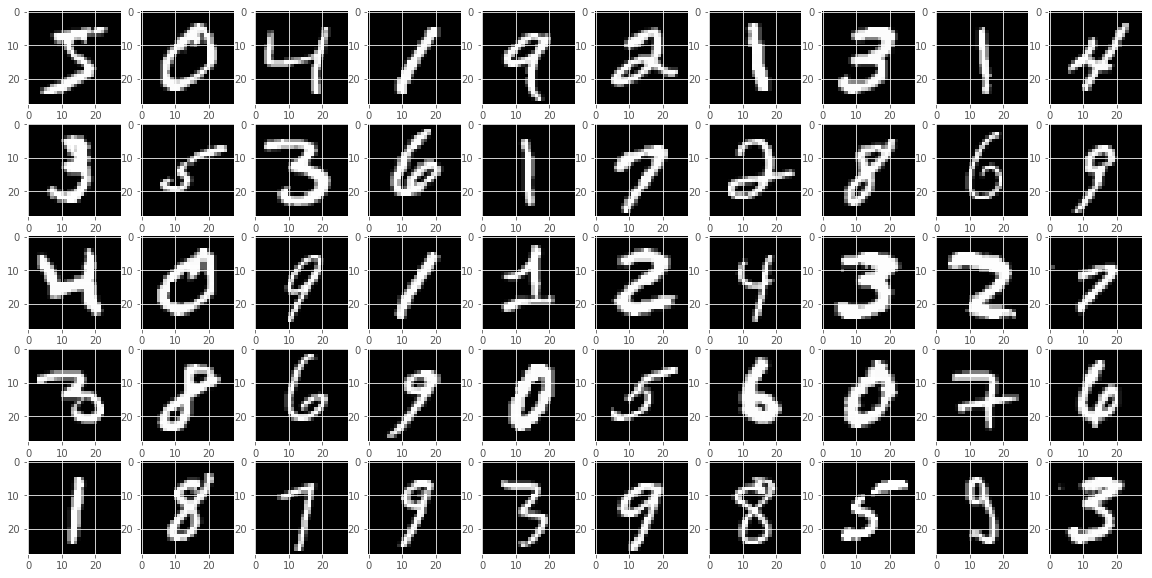

In [12]:
# Eine Auswahl von handgeschriebenen Zeichen in einem Bildraster anzeigen
cols                = 10
rows                = 5
plt.figure(figsize  = (20,10))

for i in range(rows):
    for k in range(cols):
        draw_digit(X_train[i*10+k].reshape(28,28), rows, cols, i*10+k+1)

plt.show()

### Grauwerte der Bilder für das NN aufbereiten

In [13]:
# Bildpunkttyp auf float konvertieren ....
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# ... und auf Wertebereich 0...1 transformieren
X_train /= 255
X_test  /= 255

print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)

X_train : (60000, 784)
X_test  : (10000, 784)


### Ergebnisse der Trainings- und Testdaten aufbereiten

Die Ergebnisse (Klassen der Bilder) liegen im Datensatz als Zahl vor (z.B. 7) wenn eine 7 abgebildet ist.<br />
Benötigt werden aber die Outputs des NN, also z.B. [0 0 0 0 0 0 0 1 0 0] für die abgebildete 7. 

Zu diesem Zweck müssen die Outputklassen konvertiert werden.

In [14]:
print(y_train_ori.shape)
print(y_train_ori[:5])

(60000,)
[5 0 4 1 9]


In [15]:
# Zahlenwert der Outputklasse konvertieren in 10-dim. Outputvektor transformieren
Y_train = np_utils.to_categorical(y_train_ori, 10)
Y_test  = np_utils.to_categorical(y_test_ori,  10)

print(Y_train.shape)
print()
print(y_train_ori[:5])
print()
print(Y_train[:5])

(60000, 10)

[5 0 4 1 9]

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


### Beschreibung des gewünschten Neuronalen Netzes
Mit model.add() wird Schicht für Schicht des NN beschrieben.
<ul>
<li><strong>Dense</strong>: Einfacher Fully-connected-Layer.
<li><strong>sigmoid</strong>: Logistische Aktivierrungsfunktion (Alternativen: tanh, relu, ....).
<li><strong>glorot_uniform</strong>: Methode zur zufälligen Gewichtsinitialisierung.
</ul>

Der letzte Layer ist als *softmax-Layer* ausgelegt. Die Summe der Outputs ist somit 1.

In [16]:
# ----------------------------------------------------
# Netz 1: - Multilayer-Perzeptron mit einem Hidden-Layer
#         - Logistische Aktivierungsfunktion
# ----------------------------------------------------

# Parameter des Netzes
NumNeurons_H1 = 200    #Anzahl der Neuronen im Hidden-Layer 1


# ------------------------------------------------------------------------------------------
# Beschreibung des Netzes, Layer für Layer.
# ------------------------------------------------------------------------------------------
model = Sequential()

# 1. Hidden Layer:  Fully connected mit ReLu-Aktivierungsfunktion
model.add(Dense(NumNeurons_H1,   kernel_initializer="glorot_uniform",   input_shape=(InputSize,)))
model.add(Activation("sigmoid"))


# Output Layer:  Fully connected mit Softmax-Aktivierungsfunktion
model.add(Dense(NumClasses,  kernel_initializer="glorot_uniform"))
model.add(Activation('softmax'))

# ------------------------------------------------------------------------------------------

In [17]:
# Übersicht über das NN und die Parameter
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


### Konfiguration des Lernprozesses
Gute Erklärungen zu den Parametern sind hier zu finden:  ([link](http://ruder.io/optimizing-gradient-descent/index.html#rmsprop))

In [18]:
rms  =  RMSprop()   # Adaptiver Schrittweitenfaktor .......
model.compile(loss='categorical_crossentropy',  optimizer=rms,  metrics=['accuracy'])

### Training des NN

In [218]:
# Training
history = model.fit(X_train, Y_train,
                  batch_size      =  32,    # Minibatch-Größe
                  epochs          =  10,    # Anzahl der Trainingsepochen (ohne GPU nicht übertreiben)
                  verbose         =  1,     # Informationen anzeigen
                  validation_data =  (X_test, Y_test))


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:    ', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s - loss: 0.3526 - acc: 0.9032 - val_loss: 0.2114 - val_acc: 0.9358
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 0.1837 - acc: 0.9452 - val_loss: 0.1550 - val_acc: 0.9545
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.1377 - acc: 0.9586 - val_loss: 0.1300 - val_acc: 0.9607
Epoch 4/10
60000/60000 [==============================] - 8s - loss: 0.1109 - acc: 0.9673 - val_loss: 0.1209 - val_acc: 0.9648
Epoch 5/10
60000/60000 [==============================] - 8s - loss: 0.0935 - acc: 0.9722 - val_loss: 0.0975 - val_acc: 0.9710
Epoch 6/10
60000/60000 [==============================] - 8s - loss: 0.0801 - acc: 0.9761 - val_loss: 0.0932 - val_acc: 0.9741
Epoch 7/10
60000/60000 [==============================] - 8s - loss: 0.0697 - acc: 0.9793 - val_loss: 0.0922 - val_acc: 0.9719
Epoch 8/10
60000/60000 [==============================] - 8s 

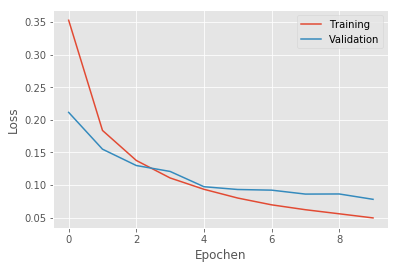

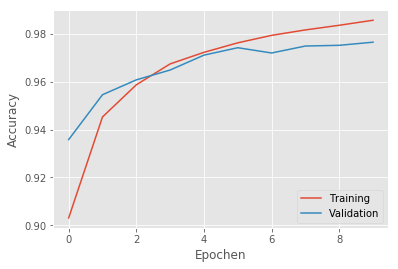

In [219]:
plt.figure(0)

plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure(1)
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()

In [222]:
# Die erkannten Klassen der Testdaten bestimmen.
predicted_classes = model.predict_classes(X_test)

# Die Indices der richtig und falsch erkannten Muster bestimmen
correct   = np.nonzero(predicted_classes == y_test_ori)[0]     # nonzero:  Return the indices of array-
incorrect = np.nonzero(predicted_classes != y_test_ori)[0]     #           elements that are non-zero

 8928/10000 [=========================>....] - ETA: 0s

### Fehleranalyse
1. Anzeigen einiger Fehlklassifikationen
2. Confusion-Matrix (= wer wird mit wem verwechselt?)

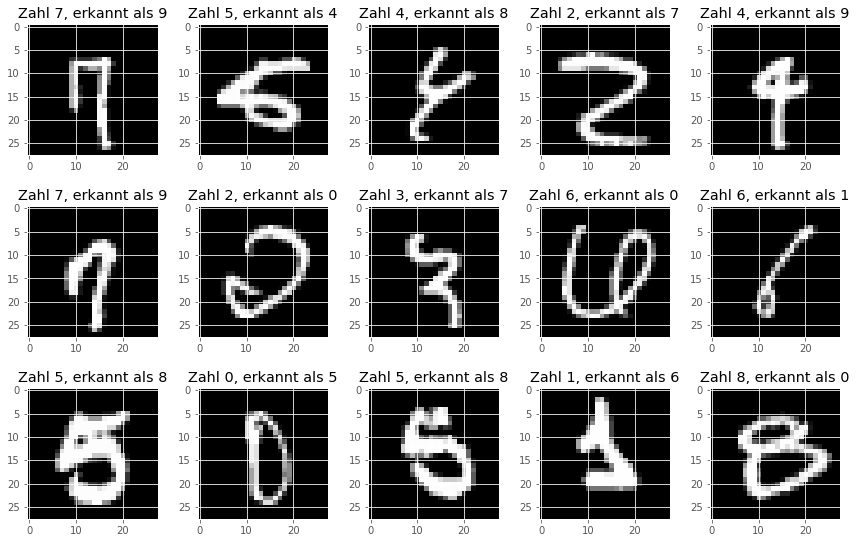

In [225]:
start                = 60    # Startindex

plt.figure(3)
plt.figure(figsize   = (12,8))
           
for i, incorr in enumerate(incorrect[start:start+15]):
    #print(i, incorr)
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[incorr].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Zahl {}, erkannt als {}".format(y_test_ori[incorr], predicted_classes[incorr]))
    plt.tight_layout()

In [227]:
# Die Confusion-Matrix zeigt an, wie oft ein Zeichen
# für ein anderes Zeichen gehalten wird.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_ori, predicted_classes))

[[ 969    0    2    1    1    1    3    1    2    0]
 [   0 1122    3    1    0    1    4    1    3    0]
 [   4    1 1000    4    3    0    3    8    9    0]
 [   0    0    4  989    1    2    0    7    4    3]
 [   0    0    4    1  963    0    4    2    2    6]
 [   3    0    0   13    2  860    7    2    4    1]
 [   4    3    0    0    3    6  937    0    5    0]
 [   1    2    9    5    2    1    0 1001    0    7]
 [   3    0    4    3    3    3    2    3  950    3]
 [   1    4    0    8   11    2    1    6    3  973]]


# ==============================================================

# Versuch 2: Multilayer-Perzeptron erweitert

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
__________

NameError: name 'history' is not defined

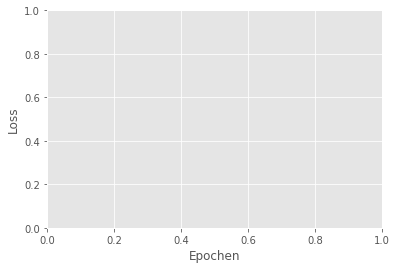

In [19]:
# -------------------------------------------------
# Netz 2: - Multilayer-Perzeptron mit 2 Hidden-Layern
#         - ReLu-Aktivierungsfunktion
#         - Dropout-Layer
# -------------------------------------------------

# Parameter des Netzes
NumNeurons_H1 = 200    #Anzahl der Neuronen im Hidden-Layer 1
NumNeurons_H2 = 100    #Anzahl der Neuronen im Hidden-Layer 2


# ------------------------------------------------------------------------------------------
# Beschreibung des Netzes, Layer für Layer.
# ------------------------------------------------------------------------------------------
model = Sequential()

model.add(Dense(NumNeurons_H1,  kernel_initializer="glorot_uniform", input_shape=(InputSize,)))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(NumNeurons_H2, kernel_initializer="glorot_uniform"))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(NumClasses, kernel_initializer="glorot_uniform"))   # Der letzte Layer hat ein Output pro Klasse.
model.add(Activation('softmax')) 
 
    
    
# Übersicht über das NN und die Parameter
model.summary()
  
    
    
# Konfiguration des Trainings
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=["accuracy"])
 
    
    
# Durchführung des Trainings
hist2= model.fit(X_train, Y_train,
                batch_size = 32, 
                epochs     = 10,
                verbose    = 1,
                validation_data = (X_test, Y_test))



# Endergebnis berechnen und ausgeben
score = model.evaluate(X_test, Y_test, verbose=0)
print()
print('Test score:   ', score[0])
print('Test accuracy:', score[1])

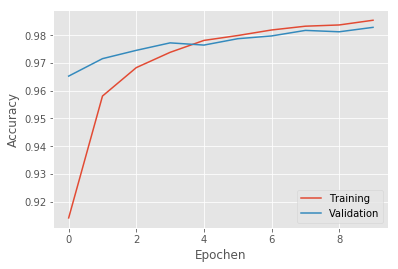

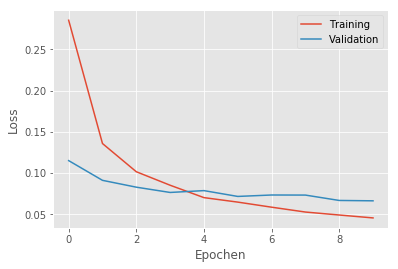

In [20]:
plt.figure(4)
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure(1)
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()

### Fehleranalyse
1. Anzeigen einiger Fehlklassifikationen
2. Confusion-Matrix (= wer wird mit wem verwechselt?)

In [21]:
# Die erkannten Klassen der Testdaten bestimmen.
predicted_classes = model.predict_classes(X_test)

# Die Indices der richtig und falsch erkannten Muster bestimmen
correct   = np.nonzero(predicted_classes == y_test_ori)[0]     # nonzero:  Return the indices of array-
incorrect = np.nonzero(predicted_classes != y_test_ori)[0]     #           elements that are non-zero

 9728/10000 [============================>.] - ETA: 0s

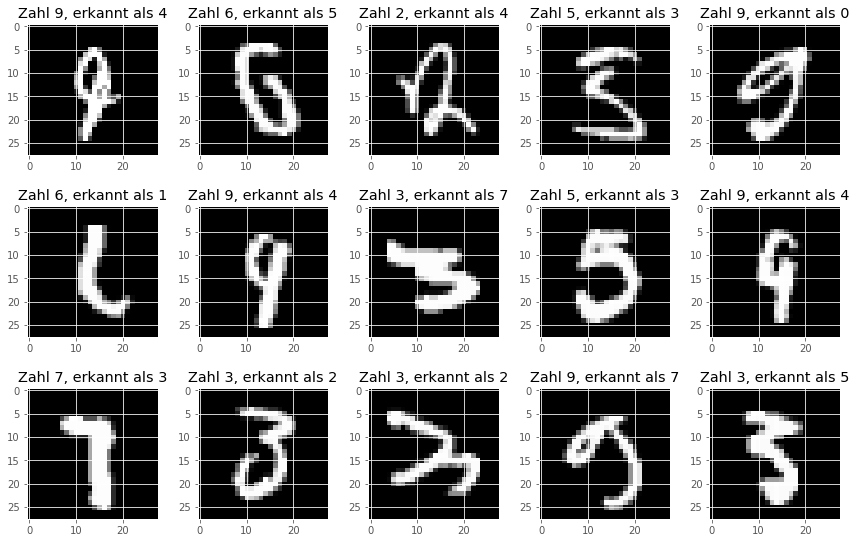

In [22]:
start                = 60    # Startindex

plt.figure(5)
plt.figure(figsize   = (12,8))
           
for i, incorr in enumerate(incorrect[start:start+15]):
    #print(i, incorr)
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[incorr].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Zahl {}, erkannt als {}".format(y_test_ori[incorr], predicted_classes[incorr]))
    plt.tight_layout()

In [23]:
# Die Confusion-Matrix zeigt an, wie oft ein Zeichen
# für ein anderes Zeichen gehalten wird.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_ori, predicted_classes))

[[ 971    0    1    2    0    1    3    2    0    0]
 [   0 1126    2    1    0    0    2    1    3    0]
 [   1    0 1017    3    2    0    2    4    3    0]
 [   0    0    2  997    0    3    0    5    2    1]
 [   1    1    1    0  971    0    5    0    1    2]
 [   2    0    0   13    1  869    2    0    3    2]
 [   4    3    0    1    2    4  941    0    3    0]
 [   0    1   12    1    0    0    0 1006    3    5]
 [   1    0    5    6    2    3    0    4  951    2]
 [   1    4    0    3   14    1    1    4    1  980]]


# ==============================================================

# Versuch 3: Kleines Faltungsnetzwerk (CNN)

### Einige zusätzliche Bibliotheken werden benötigt.

In [24]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling       import MaxPooling2D
from keras.utils                import np_utils
from keras.optimizers           import SGD

### Für Faltungsnetzwerke müssen die Bilddaten etwas anders aufbereitet werden (2-dimensional).

In [25]:
if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (ImgRows, ImgRows, 1)
    
print(shape_ord)

(28, 28, 1)


In [26]:
# ....
X_train = X_train_ori.reshape((X_train.shape[0],) + shape_ord)
X_test  = X_test_ori.reshape((X_test.shape[0],)   + shape_ord)

# Bildpunkttyp auf float konvertieren ....
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# ... und auf Wertebereich 0...1 transformieren
X_train /= 255
X_test  /= 255

print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)

X_train : (60000, 28, 28, 1)
X_test  : (10000, 28, 28, 1)


In [27]:
#Y_train = np_utils.to_categorical(y_train, NumClasses)
#Y_test  = np_utils.to_categorical(y_test,  NumClasses)

#print(Y_test.shape)

In [39]:
# ------------------------------------------------------------
# Netz 3: - Convolutional_NN mit 2 Conv-Layern + 2 Dense-Layern
#         - ReLu-Aktivierungsfunktion
#         - Dropout-Layer
# ------------------------------------------------------------

# Parameter des Netzes
NumNeurons_C1  = 100     #Anzahl der Neuronen im Conv -Layer 1
NumNeurons_C2  = 100     #Anzahl der Neuronen im Conv -Layer 2
NumNeurons_D1  = 100     #Anzahl der Neuronen im Dense-Layer 2 (Multilayer-Perzeptron)

ConvKernelSize = 3

model = Sequential()

model.add(Conv2D(NumNeurons_C1, (ConvKernelSize, ConvKernelSize), padding='valid', input_shape = shape_ord))
model.add(Activation('relu'))

model.add(Dropout(0.3))

model.add(Conv2D(NumNeurons_C2, (ConvKernelSize, ConvKernelSize)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
    
model.add(Flatten())

#model.add(Dense(NumNeurons_D1))
#model.add(Activation('relu'))

#model.add(Dropout(0.3))

model.add(Dense(NumClasses))
model.add(Activation('softmax'))

In [40]:
# Übersicht über das Faltungsnetzwerk und die Parameter
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 100)       1000      
_________________________________________________________________
activation_31 (Activation)   (None, 26, 26, 100)       0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 26, 26, 100)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 100)       90100     
_________________________________________________________________
activation_32 (Activation)   (None, 24, 24, 100)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 12, 12, 100)       0         
__________

In [ ]:
#sgd = SGD(lr=0.2, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss     =  'categorical_crossentropy',
              optimizer=  'adam',
              metrics  =  ['accuracy'])



hist3 = model.fit(X_train, Y_train, 
                  batch_size = 100, 
                  epochs     = 2,   # ohne GPU nicht mehr als 2, sonst wartet man seeehr lange.
                  verbose    = 1,
                  validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
28900/60000 [=============>................] - ETA: 393s - loss: 0.2891 - acc: 0.9101

### Fehleranalyse
1. Anzeigen einiger Fehlklassifikationen
2. Confusion-Matrix (= wer wird mit wem verwechselt?)

In [ ]:
# Die erkannten Klassen der Testdaten bestimmen.
predicted_classes = model.predict_classes(X_test)

# Die Indices der richtig und falsch erkannten Muster bestimmen
correct   = np.nonzero(predicted_classes == y_test_ori)[0]     # nonzero:  Return the indices of array-
incorrect = np.nonzero(predicted_classes != y_test_ori)[0]     #           elements that are non-zero

In [ ]:
start                = 60    # Startindex

plt.figure(6)
plt.figure(figsize   = (12,8))
           
for i, incorr in enumerate(incorrect[start:start+15]):
    #print(i, incorr)
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[incorr].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Zahl {}, erkannt als {}".format(y_test_ori[incorr], predicted_classes[incorr]))
    plt.tight_layout()